<div align="center">

# **Métodos numéricos Cuasi_Newton : L-BFGS**
### **Proyecto de Modelos de Optimizacion**
---

**Autor**: Jabel Resendiz Aguirre 
**Fecha**: 13 de enero de 2025

</div>

Inspeccionaremos el método de optimización de Broyden, Fletcher, Goldfarb y Shanno (L-BFGS) utilizando un ejemplo de minimización para la función de Rosenbrock. Además, compararemos el rendimiento del método L-BFGS con el método de descenso de gradiente. El enfoque L-BFGS, junto con varios otros rutinas de optimización numérica, está en el núcleo del aprendizaje automático. 

# Introduccion

Como hemos visto durante el curso, los problemas de optimización tienen como objetivo encontrar los mínimos o máximos de una función objetivo dada. Hay dos enfoques deterministas para los problemas de optimización: métodos de primer orden (como el descenso de gradiente, el descenso más empinado) y métodos de segundo orden (como el método de Newton). Los métodos de primer orden se basan en seguir la derivada (o gradiente) cuesta abajo/cuesta arriba para encontrar los máximos/mínimos de la función (solución óptima). Los métodos de segundo orden que se basan en la derivada de la derivada (Hessiano, una matriz que contiene las segundas derivadas) pueden estimar de manera más eficiente los mínimos de las funciones objetivo. Esto se debe a que las segundas derivadas nos dan la dirección hacia la solución óptima y el tamaño de paso requerido.

## Algoritmo (L-BFGS)

El método L-BFGS es un método iterativo para resolver problemas de optimización no lineales sin restricciones . Es un tipo de algoritmo de optimización de segundo orden y pertenece a una clase de métodos casi-Newton. Aproxima la segunda derivada para los problemas donde no puede ser calculada directamente. El método de Newton utiliza la matriz Hessiana (ya que es un método de segunda derivada). Sin embargo, tiene una limitación ya que requiere el cálculo de la inversa de la Hessiana, lo que puede ser intensivo computacionalmente. El método cuasi-Newton aproxima la inversa de la Hessiana utilizando el gradiente y, por lo tanto, puede ser computacionalmente factible a través de un método de secante generalizado.

El método BFGS (L-BFGS es una extensión de BFGS) actualiza el cálculo de la matriz Hessiana en cada iteración en lugar de recalcularla. Sin embargo, el tamaño de la Hessiana y su inversa dependen del número de parámetros de entrada a la función objetivo. Por lo tanto, para un problema grande, el tamaño de la Hessiana puede ser un problema a gestionar. El L-BFGS resuelve esto asumiendo una simplificación de la inversa de la Hessiana en la iteración anterior. A diferencia de BFGS, que se basa en todo el historial de los gradientes, L-BFGS se basa en los n gradientes más recientes (típicamente de 5 a 20, lo que requiere un almacenamiento mucho más pequeño).También se utiliza comúnmente el L-BFGS, que es una versión de BFGS con memoria limitada que es particularmente adecuada para problemas con un gran número de variables (por ejemplo, >1000). La variante BFGS-B maneja restricciones de caja simples. La matriz BFGS también admite una representación compacta, lo que la hace más adecuada para problemas grandes con restricciones.

## Método de Newton

La mayoría de los procedimientos de optimización numérica son algoritmos iterativos que consideran una secuencia de 'suposiciones' $x_{n}$ que, en última instancia, convergen a x∗, el verdadero minimizador global de f. Supongamos que tenemos una estimación $x_{n}$ y queremos que nuestra siguiente estimación $x_{n+1}$ tenga la propiedad de que $f(x_{n+1}) < f(x_{n})$.

El método de Newton se centra en una aproximación cuadrática de f para puntos cercanos a $x_{n}$. Suponiendo que f es dos veces diferenciable, podemos usar una aproximación cuadrática de f para puntos 'cercanos' a un punto fijo x utilizando una expansión de Taylor:

\begin{align}
f(x + \Delta x) ≈ f(x) + \Delta x^{T} \nabla f(x) + \frac{1}{2} \Delta x^{T}(\nabla ^{2} f(x))\Delta x
\end{align}

Donde $\nabla f(x)$ y $\nabla ^{2} f(x)$ son el gradiente y la Hessiana de f en el punto $x_{n}$. Esta aproximación se mantiene en el límite a medida que ||Δx||→0.

También puede ser usado para más simplificación y pensar más en nuestros algoritmo iterativo para producir una secuencia de tales aproximaciones cuadráticas de $h_{n}$, donde escribimos $x_{n+1} = x_{n} + \Delta x$ y reescribir como:


$h_{n}(\Delta x) = f(x_{n})+ \Delta x^{T} g_{n} + \frac{1}{2} \Delta x^{T} H_{n}\Delta x$

con $g_{n}$ y $H_{n}$ representan el gradiente y la Hessiana de f en $x_{n}$.

Queremos elegir $\Delta x$ para minimizar esta aproximación cuadrática local de f en $x_{n}$. Al derivar con respecto a Δx arriba obtenemos:

$\frac{\partial h_{n}(\Delta x)}{\partial \Delta x}= g_{n} + H_{n}\Delta x$

Por la condición de extremo sabemos que para que un punto sea extremo local de $h_{n}(.)$ tiene que cumplir que $\frac{\partial h_{n}(\Delta x)}{\partial \Delta x} =0 $. Si asumimos que $H_{n}$ es definida positiva entonces sabemos que $\Delta x$ es también un mínimo global . Resolviendo para $\Delta x$:

$\Delta x= -H_{n}^{-1}g_{n}$

Esto sugiere que $-H_{n}^{-1}g_{n}$ es una buena dirección de moverse $x_{n}$. En la practica , tenemos que $x_{n+1} = x_{n} - \alpha (-H_{n}^{-1}g_{n})$ para un valor de $\alpha$ donde $f(x_{n+1})$ es suficientemente menor que $f(x_{n})$

### Pseudocógido

`NewtonRaphson (f,x0):`

    For n=0,1,.. (unitl converged)

        Compute gn y la inversa de Hn para xn

        d= Hn^(-1)gn
        a= min a>0 (f(xn-ad))

        xn+1 = xn -ad
    

El cálculo del tamaño del paso α
puede utilizar cualquier número de algoritmos de búsqueda de línea ,incluso con una simple prueba de valores cada vez más pequeños de $\alpha $ hasta que el valor de la función sea "suficientemente pequeño". Este algoritmo prueba que para una función convexa convergerá a un minimizador global único x* independiente de la elección de $x_0$. Para las funciones no convexas solo se garantiza que convergerá a un mínimo local. En la práctica entonces se debe prestar más atención al punto de inicialización que a detalles del algoritmo, que se podría utilizar una especie de [heurística](https://ccc.inaoep.mx/~emorales/Cursos/Busqueda/node64.html) de cambiar de vecindad mientras se realiza la búsqueda, eso garantizará salir de los atascos provocados por los extremos locales.

Este algoritmo que se muestra a continuación implementa una búsqueda de línea con retroceso (backtracking line search) para encontrar un tamaño de paso que satisfaga la [condición de Armijo](https://cms.dm.uba.ar/academico/materias/1ercuat2019/optimizacion/Clase_04.html), lo cual garantiza una reducción suficiente en el valor de la función objetivo

In [21]:
import numpy as np
from autograd import grad, hessian
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import minimize  
from scipy.optimize import rosen, rosen_der
from matplotlib import cm # mapas de calos
import time # medir el tiempo de ejecucion
np.random.seed(122)

In [22]:
import numpy as np

class BacktrackingLineSearcher:
    def __init__(self, alpha=0.5, beta=0.01, min_step_len=1e-10):
        self.alpha = alpha #  Factor que reduce el tamaño del paso
        self.beta = beta # constante de Armijo
        self.min_step_len = min_step_len # Tamaño mínimo del paso

    def minimize(self, grad_fn, x, direction):
        """
        grad_fn: función que devuelve el valor de la función objetivo y su gradiente en un punto
        x: El punto actual en el espacio de búsqueda.
        directior: La dirección en la que se intentará avanzar.
        """

        # se calcula el valor y el gradiente de la funcion en el punto
        f0, grad = grad_fn(x) 
        
        if np.dot(grad, grad) < self.min_step_len:
            return 0.0, f0 #no avanzamos, retornamos el valor actual

        delta = self.beta * np.dot(grad, direction)
        step_len = 1.0

        while step_len >= self.min_step_len:
            step_x = x + step_len * direction
            fx, _ = grad_fn(step_x)
            
            # condicion de Armijo
            if fx <= f0 + step_len * delta:
                return step_len, fx
            
            step_len *= self.alpha

        raise RuntimeError("Step-size underflow")



Entonces una sencilla implementación de Newton_Raphson es:

In [23]:

class Newton_raphson:
    def __init__(self,f, tol = 1e-10,max_iters=10000):
        self.f = f
        self.tol = tol
        self.max_iters = max_iters
        self.df = grad(f)
        self.ddf = hessian(f)
        self.line_minimizer = BacktrackingLineSearcher()

    def grad_fn(self,x):
        """
        Función que devuelve el valor de la función objetivo y su gradiente en un punto.
        """
        return self.f(x), self.df(x)

    def method(self,x0):
        """
        Minimiza la función utilizando el método de Newton-Raphson.

        :param x0: Valor inicial.
        :return: El mínimo de la función.
        """
        x=x0
        path = [x0.copy()]
        for n in range(self.max_iters):
            grad_val = self.df(x)
            hess_val = self.ddf(x)

            # comprueba si la norma del gradiente de f(x) es menor que la tolerancia
            if np.linalg.norm(grad_val) < self.tol:
                break

            d = np.linalg.inv(hess_val).dot(grad_val)
            d *= -1  # Invertir la dirección, para obtener una direccion de descenso

            #Usar el BacktrackingLineSearch() implementado bajo la condicion de Armijo
            step_len,_ = self.line_minimizer.minimize(self.grad_fn,x,d)

            x = x + step_len *d
            path.append(x.copy())
        
        return x,path

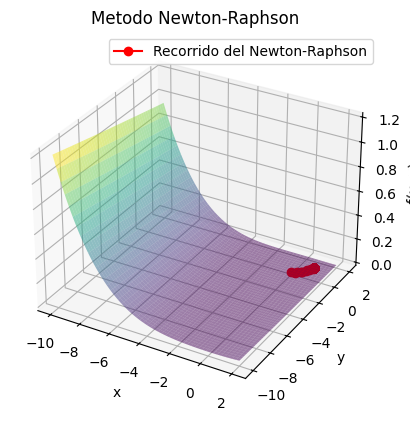

Tiempo total tomado para la ejecucion: 31.8024s
Solucion: f([0.99999998 0.99999995]) = 0.00000


In [24]:
# Testeo en una funcion 3D

# def f(x):
#     return x[0]**2 + x[1]**2 + 4*x[0] + 4*x[1] + 89

def f(x):
    return 100 * (x[1]-x[0]**2)**2 + (1-x[0])**2 

starttime = time.perf_counter()
x0 = np.array([0.0, 0.0])
newton_raphson = Newton_raphson(f)
min_x, path = newton_raphson.method(x0)

# Visualización 3D
x_vals = np.linspace(-10, 2, 400)
y_vals = np.linspace(-10, 2, 400)
X, Y = np.meshgrid(x_vals, y_vals)
Z = f(np.array([X, Y]))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, alpha=0.5, cmap='viridis')

path = np.array(path)
ax.plot(path[:, 0], path[:, 1], f(path.T), 'ro-', label='Recorrido del Newton-Raphson')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
ax.legend()
plt.title('Metodo Newton-Raphson')
plt.show()

print(f"Tiempo total tomado para la ejecucion: {time.perf_counter()-starttime:.4f}s")
print('Solucion: f(%s) = %.5f' % (min_x, f(min_x)))


## Que sucede entonces? 
La complejidad de nuestro método de Newton está calculada en orden $O(n^3)$
Sucede con este algoritmo propuesto que en ramas diversas del machine learning donde se analizan millones de parámetros para el vector, entonces computar la hessiana es extremadamente costoso o incluso su inversa incomputable entonces se ha decidido tomar como un buen algoritmo para establecer pautas básicas para otros más generales y por ello he comenzado por ahí. Afortunadamente , el algortimo anterior puede funcionan incluso si $H_{n}^{-1}$ no corresponde con la hessiana inversa exacta de $x_{n}$ sino con una "buena" aproximación de ella, ahí entra a ser analizados el algoritmo de BFGS propuesto. 

## Casi-Newton

Los métodos Casi-Newton son aquellos que en vez de calcular la matriz hessiana de manera exacta , establecen una aproximación iterativamente, lo cual se ve manifestado en un menor costo computacional y más efectivos en problemas de grandes dimensiones.

### Pseudocódigo

**Entrada**:  
- $ f $: Función objetivo  
- $ x_0 $ Punto de inicio  
- $ H^{-1}_0 $: Aproximación inicial de la inversa de la matriz Hessiana  
- $ \text{QuasiUpdate} $: Método de actualización para la inversa de la Hessiana (como BFGS)

**Para** $n = 0, 1, 2, \dots $ (hasta converger):  
1. **Calcular la dirección de búsqueda y el tamaño del paso**:
   $
   d = H^{-1}_n \cdot g_n
   $

   donde $ g_n = \nabla f(x_n) $ es el gradiente en $ x_n $.

2. **Seleccionar el tamaño del paso $ \alpha $**:

   $
   \alpha \leftarrow \min_{\alpha \geq 0} f(x_n - \alpha d)
   $

3. **Actualizar el punto**:

   $
   x_{n+1} \leftarrow x_n - \alpha d
   $

4. **Almacenar las diferencias de entrada y gradiente**:

   $
   g_{n+1} \leftarrow \nabla f(x_{n+1})
   $

   $
   s_{n+1} \leftarrow x_{n+1} - x_n
   $

   $
   y_{n+1} \leftarrow g_{n+1} - g_n
   $

5. **Actualizar la inversa de la Hessiana**:

   $
   H^{-1}_{n+1} \leftarrow \text{QuasiUpdate}(H^{-1}_n, s_{n+1}, y_{n+1})
   $

---

**Condición de convergencia**: El algoritmo termina cuando $ \| g_{n+1} \| $ es suficientemente pequeño (es decir, cuando el gradiente es casi cero).





Aquí el método **QuasiUpdate** define una política de actualización de la matriz hessiana inversa que no hemos definido aún. Notemos que lo que varía es que si **QuesiUpdate** devuelve la hessiana inversa exactamente , entonces el método se reduce a sencillamente el método de Newton_Raphson.

Inicialmente una buena idea es tomar como $H_{0}$ la matriz identidad, sin embargo , esto se basa en la simplicidad del [gradiente descendente](https://en.wikipedia.org/wiki/Gradient_descent) donde la idea es dar pasos en la dirección opuesta del gradiente (descendentemente) es decir:

$x_{n+1}= x_{n} - \alpha_{n}\nabla f(x_{n})$

Si bien esto realmente produce un procedimiento válido que convergerá a x∗ para f convexa
, intuitivamente esta elección de QuasiUpdate
no intenta capturar información de segundo orden sobre f. 

Pensemos entonces en nuestra elección de $H_{n}$ como aproximación para f cerca de $x_{n}$:

$h_{n}(d) = f(x_{n}) + d^{T}g_{n} + \frac{1}{2}d^{T}H_{n}d$

### Condicion de la Secante:

Una buena propiedad para $h_{n}(d)$ es que su gradiente concuerde con f en $x_{n}$ y $x_{n-1}$. En otras palabras, nos gustaría asegurarnos de que:

$\nabla h_{n}(x_{n}) = g_{n}$

$\nabla h_{n}(x_{n-1})= g_{n-1}$

Osea eso teniendo en cuenta que:

\begin{align}
\nabla h_{n}(d) &= g_{n} + H_{n}d \tag{1}
\end{align}

donde nuestro objetivo es que $H_{n}$ sea una buena aproximación de la curvatura de $f_{x}$. Para ello queremos entonces que el gradiente de $h_{n}(d)$ sea lo más parecido con los gradientes reales de $f(x)$ en $x_{n}$ y $x_{n-1}$ recordemos que $h_{n}(d)$ es la aproximación cuadrática local de f(x). 

Entonces tenemos que :

\begin{align}
\nabla h_{n}(x_{n}) - \nabla h_{n}(x_{n-1}) &=g_{n} - g_{n-1} \tag{2}
\end{align}

Susituyendo (1) en (2) y tenemos entonces 

$g_{n} - g_{n-1} = \nabla h_{n}(x_{n}) - \nabla h_{n}(x_{n-1}) = g_{n} - [g_{n} + H_{n}(x_{n-1}-x_{n})] = H_{n}(x_{n} - x_{n-1}) $

Recuerden que consideramos a d como el vector de desplazamiento desde $x_{n}$.

Considerando que $y_{n} = g_{n} - g_{n-1}$ y que $s_{n}= x_{n} - x_{n-1}$ entonces la expresión se convierte en : 

\begin{align}
H_{n}s_{n}= y_{n} \tag{3}
\end{align}

Está condición representa que la matriz Hessiana aproximada $H_{n}$ respeta los cambios observados en la función f(x) al menos en la dirección entre $x_{n}$ y $x_{n-1}$, es decri entonces que la condición de la secante asegura que $H_{n}$ capture correctamente el comportamiento de f(x) en la dirección $s_{n}= x_{n}- x_{n-1}$.

### Simetría

Sabemos que la matriz hessiana es simétrica si f es dos veces continuamente diferenciable, debido a que el orden de las derivadas parciales no afecta el resultado es decir:

$\partial ^2 \frac{f}{\partial x_{i}\partial x_{j}} = \partial ^2 \frac{f}{\partial x_{j}\partial x_{i}}$

### Entonces , cuándo definimos la actualización BFGS ...

Bueno ya viendo estas dos condiciones podemos establecer que queremos que $H_{n}$ satisfaga ambas condiciones es decir:

- Secante cumpla para $s_{n}$ y $y_{n}$

- $H_{n}$ sea simétrica

Dadas las dos condiciones anteriores, nos gustaría tomar el cambio más conservador en relación con $H_{n-1}$, es decir el cambio "más pequeño" .

\begin{align}
\min H^{-1} \quad \| H^{-1} - H^{-1}_{n-1} \|^{2}

\end{align}

\begin{align}
y_n = Hs_n  \quad \text{y} \quad H^{-1} \text{ es simétrica.}
\end{align}

Aquí hemos usado la norma Euclideana $|| . ||$ . La solucion a este problema de optimización es dada por:

\begin{align}
H_{n+1} ^ {-1} = (I - \rho _{n} y_n s_{n}^{T}) H_{n}^{-1} (I - \rho _{n} s_n y_{n}^{T}) + \rho _n s_n s_{n} ^ T
\end{align}

donde $\rho = \frac{1}{y_{n}^T s_n}$ es el facto de  normalización que garantiza la correcta actualización. Esta fórmula es una derivación de la fórmula de [Sherman-Morrison](https://en.wikipedia.org/wiki/Sherman%E2%80%93Morrison_formula) y una propuesta llamada Rank one direction o SR1 , que permite actualizar la inversa de una matriz de forma eficiente cuando se suman matrices de rango 1 (como $y_{n}s_{n}^T$ y $s_{n}y_{n}^T$) a la matriz inversa previa. La fórmula de Sherman-Morrison es útil porque, en vez de recalcular toda la inversa desde cero, nos permite ajustar la inversa en cada paso utilizando una operación de rango bajo, lo que hace que la actualización sea computacionalmente más eficiente.


- $H_{n+1}^{-1}$ es definida positiva cuando $H_{n} ^{-1}$ lo es, asumiendo que $H_{0}$ es definida positiva entonces por inducción se comprueba que cada Hessiana inversa estimada lo es también. Entonces podemos tomar cualquier $H_{0}$ , aunque lo normal sea que tomemos la matriz identidad I , que como bien definimos arriba es la que relaciona al famosos método de gradiente descendente.

- Esta específica relación de recurrencia entre $H_{n+1}^{-1}$ y $H_{n}^{-1}$ solo es permitido usando los valores de $s_{n}$ y $y_{n}$


Ahora se propone un algoritmo procedimental para calcular $H_{n}^{-1} d$ para una dirección d, sin formar nunca la matriz $H_{n}^{-1}$

### Pseudocódigo: Cálculo del producto $( H_n^{-1} d )$ en BFGS llamado BFGSMultiply

#### Entrada:
- $ H_0^{-1} $: Aproximación inicial del inverso del Hessiano (generalmente la identidad).
- $ {s_k} $: Secuencia de vectores $ s_k = x_{k+1} - x_k $.
- $ {y_k} $ : Secuencia de vectores $ y_k = \nabla f(x_{k+1}) - \nabla f(x_k) $.
- $ d $: Vector dirección para el producto $H_n^{-1} d $.

#### Salida:
- $ r $: Resultado del producto $ H_n^{-1} d $.

---

#### Inicialización:
1. $ r \leftarrow d $  
   // Inicializa  r  con el vector de dirección  d.  

#### Paso 1: Producto hacia la derecha (etapa "Right Product"):
2. Para $ i = n, n-1, \ldots, 1 $:  
   - $ \rho_i \leftarrow \frac{1}{y_i^T s_i} $  
     // Calcula el escalar inverso de $ y_i^T s_i $.  
   - $ \alpha_i \leftarrow \rho_i \cdot s_i^T r $  
     // Proyecta $ r $ sobre $ s_i $.  
   - $ r \leftarrow r - \alpha_i y_i $  
     // Actualiza $ r $ restando la proyección sobre $ y_i $.  

#### Paso 2: Producto central:
3. $ r \leftarrow H_0^{-1} r $  
   // Aplica la matriz inicial $ H_0^{-1} $ al vector $ r $.  

#### Paso 3: Producto hacia la izquierda (etapa "Left Product"):
4. Para $ i = 1, 2, \ldots, n $:  
   - $ \beta \leftarrow \rho_i \cdot y_i^T r $  
     // Proyecta $ r $ sobre $ y_i $.  
   - $ r \leftarrow r + (\alpha_{n-i+1} - \beta) s_i $  
     // Corrige $ r $ con la combinación lineal de $ s_i $.  

#### Salida:
5. Retornar $ r $.  
   // $ r $ es el resultado final $ H_n^{-1} d $.  


In [33]:
class BFGSMultiply:
    def __init__ (self,H0_inv):
        #matriz inicial
        self.H0_inv = H0_inv

    def multiply(self,s_list,y_list,d):
        """
        Calcula el producto H_n^{-1} d usando el algoritmo BFGS.

        :param s_list: Secuencia de vectores s_k = x_{k+1} - x_k.
        :param y_list: Secuencia de vectores y_k = ∇f(x_{k+1}) - ∇f(x_k).
        :param d: Vector dirección para el producto H_n^{-1} d.
        :return: Resultado del producto H_n^{-1} d.
        """
        n = len(s_list)
        r = d.copy()
        alpha = np.zeros(n)
        rho = np.zeros(n)

        # Paso 1: Producto hacia la derecha (etapa "Right Product")
        for i in range(n-1, -1, -1):
            rho[i] = 1.0 / np.dot(y_list[i], s_list[i])
            alpha[i] = rho[i] * np.dot(s_list[i], r)
            r -= alpha[i] * y_list[i]

        # Paso 2: Producto central
        r = np.dot(self.H0_inv, r)

        # Paso 3: Producto hacia la izquierda (etapa "Left Product")
        for i in range(n):
            beta = rho[i] * np.dot(y_list[i], r)
            r += (alpha[i] - beta) * s_list[i]

        return r


Cómo queda entonces nuestro algortimo de Quasi_Newton una vez que hemos definido esta parte del algoritmo:


### Pseudocódigo: Método Casi-Newton

#### Inicialización:
1. Definir:
   - $x_0 $: Punto inicial.
   - $ H_0^{-1} = I $ Aproximación inicial del inverso del Hessiano (típicamente la identidad).
   - $ \text{QuasiUpdate} $ Función de actualización para $ H^{-1} $ (por ejemplo, BFGS).
2. Establecer tolerancia de convergencia $ \epsilon $.

---

#### Iteración principal (hasta converger):

**Para $ n = 0, 1, \ldots $**
1. **Dirección de descenso:**
   - Usar la subrutina `BFGSMultiply` para calcular:  
     $
     d = -H_n^{-1} \nabla f(x_n)
     $

     Donde `BFGSMultiply` evita construir explícitamente $ H_n^{-1} $, utilizando las actualizaciones acumuladas de rango bajo.  

2. **Búsqueda de línea:**
   - Encontrar $ \alpha \geq 0 $ que minimice $ f(x_n - \alpha d) $  para determinar el tamaño del paso.
   - Calcular el nuevo punto:  
     $
     x_{n+1} = x_n - \alpha d
     $

3. **Actualizar deltas:**
   - Calcular:
     $
     s_{n+1} = x_{n+1} - x_n
     $

     $
     y_{n+1} = \nabla f(x_{n+1}) - \nabla f(x_n)
     $

4. **Actualizar el inverso del Hessiano:**
   - Se llama a la rutina de actualización `QuasiUpdate` con los argumentos actuales: 

     $
     H_{n+1}^{-1} = \text{QuasiUpdate}(H_n^{-1}, s_{n+1}, y_{n+1})
     $

     Aquí es donde entra la fórmula de BFGS:

     $
     H_{n+1}^{-1} = (I - \rho_n y_n s_n^T) H_n^{-1} (I - \rho_n s_n y_n^T) + \rho_n s_n s_n^T
     $
     
     con $ \rho_n = \frac{1}{y_n^T s_n} $.

5. **Verificar convergencia:**
   - Si $ ||\nabla f(x_{n+1})|| \leq \epsilon $, detener el algoritmo.  

---

#### Subrutinas utilizadas:

**Subrutina: BFGSMultiply**  
- Calcula $ H_n^{-1} \nabla f(x_n) $ usando las actualizaciones acumuladas de rango bajo.

**Subrutina: QuasiUpdate**  
- Actualiza $ H_n^{-1} $ según la variante elegida (BFGS, DFP, etc.).

---

### Flujo completo del algoritmo:
1. Inicializar $ x_0 $, $H_0^{-1} $ y los parámetros necesarios.
2. Iterar hasta converger:
   - Calcular la dirección $ d $ con `BFGSMultiply`.
   - Realizar la búsqueda de línea para encontrar $ \alpha $
   - Actualizar $ x_{n+1}, s_{n+1}, y_{n+1} $.
   - Actualizar $ H_{n+1}^{-1} $ con `QuasiUpdate`.
3. Verificar tolerancia y retornar el resultado final $ x^* $.

---

#### Notas:
- Este método combina eficiencia y precisión al evitar construir explícitamente $ H_n^{-1} $, reemplazándolo con productos vectoriales acumulativos.
- `BFGSMultiply` y `QuasiUpdate` son esenciales para mantener el costo computacional bajo.



In [38]:
def quasi_update(H_inv, s, y):
    rho = 1.0 / np.dot(y, s)
    I = np.eye(len(s))
    V = I - rho * np.outer(s, y)
    H_inv_new = np.dot(V, np.dot(H_inv, V.T)) + rho * np.outer(s, s)
    return H_inv_new

class QuasiNewton:
    def __init__(self, f, tol=1e-10, max_iters=100):
        self.f = f
        self.tol = tol
        self.max_iters = max_iters
        self.df = grad(self.f)
        self.line_minimizer = BacktrackingLineSearcher()

    def grad_fn(self, x):
        return self.f(x), self.df(x)

    def minimize(self, x0):
        x = x0
        H_inv = np.eye(len(x0))
        s_list = []
        y_list = []
        path = [x0.copy()]

        for n in range(self.max_iters):
            grad_val = self.df(x)
            if np.linalg.norm(grad_val) < self.tol:
                break

            bfgs_multiply = BFGSMultiply(H_inv)
            d = -bfgs_multiply.multiply(s_list, y_list, grad_val)

            step_len, _ = self.line_minimizer.minimize(self.grad_fn, x, d)
            x_new = x + step_len * d

            s = x_new - x
            y = self.df(x_new) - grad_val

            s_list.append(s)
            y_list.append(y)

            H_inv = quasi_update(H_inv, s, y)

            x = x_new
            path.append(x.copy())

        return x, path

## L_BFGS : BFGS con un presupuesto de memoria

La aproximación BFGS de cuasi-newton tiene la ventaja de no requerir que seamos capaces de calcular analíticamente el hessiano de una función. Sin embargo, todavía debemos mantener un historial de los vectores $s_n$
e $y_n$ para cada iteración. Dado que una de las preocupaciones principales del algoritmo NewtonRaphson eran los requisitos de memoria asociados con el mantenimiento de un hessiano, el algoritmo BFGS de cuasi-newton no aborda eso ya que nuestro uso de memoria puede crecer sin límite.

El algoritmo L-BFGS, llamado así por el BFGS limitado, simplemente trunca la actualización BFGSMultiply para usar las últimas m
diferencias de entrada y diferencias de gradiente. Esto significa que solo necesitamos almacenar $s_n, s_{n-1},..., s_{n-m-1}$ y $y_n, y_{n-1},..., y_{n-m-1}$ para calcular la actualización. El producto central todavía puede utilizar cualquier matriz definida positiva simétrica $H_{0} ^ {-1}$ que también puede depender de cualquier ${s_k}$ o $y_{k}$.

Existen muchas variantes de L-BFGS que se utilizan en la práctica. Para funciones no diferenciables, existe una variante de función diferencial que es adecuada para entrenar la pérdida regularizada L1. Incluso una que de las que proponemos más adelante que es L-BFGS-B(Limited-memory Broyden–Fletcher–Goldfarb–Shanno with Box constraints) donde B de Box constrainst Añade la capacidad de manejar restricciones de caja en las variables, es decir:

\begin{align}
l_i \leq x_i \leq u_i \quad \forall i
\end{align}

donde $l_i$ y $u_i$ son los límites inferiores y superiores respectivamente para cada variable $x_i$

# Resumen General del Método Cuasi-Newton

## Asunción de un Único Mínimo Global
- Se parte de la suposición de que $ f $ tiene un único mínimo global.
- Sin embargo, en la práctica, a menos que $f $ sea estrictamente convexa, los parámetros resultantes son simplemente los valores producidos por el algoritmo iterativo.

## Interpretación del Paso de Descenso
- El producto $-H^{-1} \nabla f $ da una dirección hacia un extremo local porque el gradiente se anula allí.
- Si el hessiano $ H $ tiene curvatura positiva (es decir, es positivo definido), podemos garantizar que se trata de un mínimo local.
- Si $ $ es convexa, el hessiano es positivo definido en todas partes, lo que asegura un único mínimo global.

## Necesidad de Productos con $ H^{-1} $
- En lugar de calcular explícitamente $H^{-1} $ solo se requiere ser capaz de multiplicar $H^{-1} $ por una dirección $d $ .Esto simplifica significativamente la implementación y el costo computacional.

## Generalidad en la Matriz de Ponderación $ W $
- Aunque la norma utilizada para medir diferencias puede incluir una matriz de ponderación $ W $ , el método es robusto a diferentes elecciones de $ W $ , siempre que $ W $ sea positivo definida y satisfaga $ W s_n = y_n $ .
- Bajo estas condiciones, se obtiene la misma solución.

---

## Conclusión
Este resumen destaca las bases teóricas y las consideraciones prácticas del método cuasi-Newton:
- Su efectividad en problemas convexos.
- La importancia de trabajar con productos eficaces con $ H^{-1} $ , evitando su cálculo explícito.
- Su flexibilidad frente a diferentes elecciones de métricas y normativas.

Este enfoque lo hace ampliamente aplicable en la optimización, incluso en problemas no convexos, aunque en tales casos no se garantiza la optimalidad global.


# Anexo

Este código implementa un ejemplo de optimización utilizando el algoritmo L-BFGS-B para minimizar la función de Rosenbrock, una función comúnmente utilizada como benchmark en algoritmos de optimización.

La `Función de Rosenbrock` está definida como:

\begin{align}
f(x,y)= (x-1)^2 + b(y-x^2)^2
\end{align}

Donde b es un parámetro que controla la forma de la función. En este caso tomemos b = 10

Es una función no convexa en espacios multidimensionales, pero su mínimo global está en $(x,y)= (1,1)$ donde $f(1,1)=0$ (para ellos hemos usado `scipy.optimize.minimize` con el método `L-BFGS-B`)

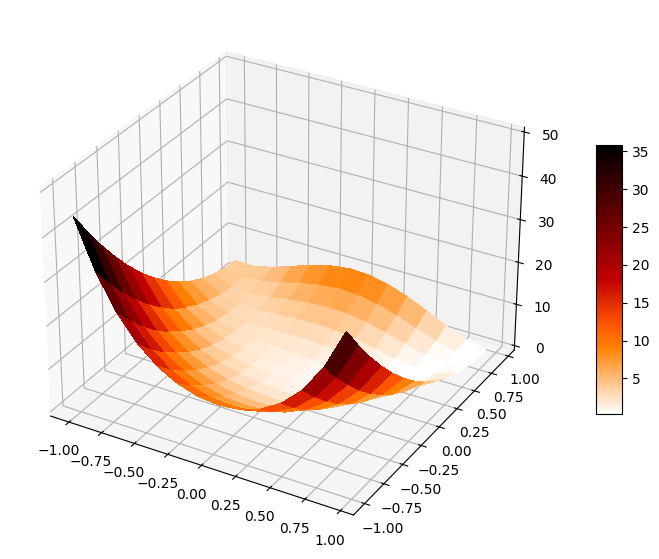

Punto inicial:  [-0.47704347 -0.09657418]
Tiempo total tomado para la ejecucion: 0.0019s
Estado : CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL
Numero de Evaluaciones: 16
Solucion: f([1.00000001 1.00000001]) = 0.00000


In [26]:

def plot_objective(objective):
    # Inicializa la figura
    figRos = plt.figure(figsize=(12, 7))
    axRos = plt.subplot(111, projection='3d')

    # Evalua la funcion
    X = np.arange(-1, 1, 0.15)
    Y = np.arange(-1, 1, 0.15)
    X, Y = np.meshgrid(X, Y)
    XX = (X,Y)
    Z = objective(XX)

    # Dibujar la superficie
    surf = axRos.plot_surface(X, Y, Z, cmap=cm.gist_heat_r,
                        linewidth=0, antialiased=False)
    axRos.set_zlim(0, 50)
    figRos.colorbar(surf, shrink=0.5, aspect=10)
    plt.show()


## funcion de Rosenbrock
b = 10
def objective(x):
    f = (x[0]-1)**2 + b*(x[1]-x[0]**2)**2
    return f


plot_objective(objective)

# derivada de la funcion objetivo (gradiente)
def derivative(x):
    df = np.array([2*(x[0]-1) - 4*b*(x[1] - x[0]**2)*x[0], \
                         2*b*(x[1]-x[0]**2)])
    return df


starttime = time.perf_counter()
# define rango par valores de entrada 
r_min, r_max = -1.0, 1.0

# gener un punto aleatorio de inicio
pt = r_min + np.random.rand(2) * (r_max - r_min)
print('Punto inicial: ', pt)

# ejecuta el algoritmo de optimización
result = minimize(objective, pt, method='L-BFGS-B', jac=derivative)
print(f"Tiempo total tomado para la ejecucion: {time.perf_counter()-starttime:.4f}s")
# muestra el resultado
print('Estado : %s' % result['message'])
print('Numero de Evaluaciones: %d' % result['nfev'])


# evalua la solucion
solution = result['x']
evaluation = objective(solution)
print('Solucion: f(%s) = %.5f' % (solution, evaluation))

Aquí las zonas más claras representan mínimos locales.
 
Ahora veamos cómo se comporta con otro método visto tal como el del gradiente descendente

In [30]:
starttime = time.perf_counter()

cur_x = r_min + np.random.rand(2) * (r_max - r_min)

print('Punto inicial: ', pt)

rate = 1e-2 # Tasa de aprendizaje (learning rate)
precision = 1e-8 # Esta es la precisión, nos indica cuando detener el algoritmo
previous_step_size = 1 # Inicializamos el tamaño del paso anterior con un valor arbitrario
max_iters = 1e4 # Número máximo de iteraciones
iters = 0 # Contador de iteraciones

# Bucle principal del algoritmo de descenso de gradiente
while previous_step_size > precision and iters < max_iters:
    prev_x = cur_x # Guardamos el valor actual de x en prev_x para poder calcular el cambio
    cur_x = cur_x - rate * derivative(prev_x) # Actualizamos el valor de x usando el descenso de gradiente
    previous_step_size = sum(abs(cur_x - prev_x)) # Calculamos el cambio en el valor de x (tamaño del paso)
    iters = iters+1 # Incrementamos el contador de iteraciones

print(f"Tiempo total tomado para la ejecucion: {time.perf_counter()-starttime:.4f}s")
print("El punto local ocurre en el punto", cur_x, "para un numero de iteraciones:", iters)


Punto inicial:  [-0.68601632  0.40442008]
Tiempo total tomado para la ejecucion: 0.0942s
El punto local ocurre en el punto [0.99999917 0.99999831] para un numero de iteraciones: 3280


Como vemos es un práctico caso de las diferencias computacionales de ambos métodos que hemos venido resaltando:

- Método `L-BFGS-B` es más eficiente en el sentido del número de iteraciones hechas para alcanzar el resultado, usando a su favor el uso de la matriz hessiana aproximada.

- Método `gradiente descendente` sigue siendo un método de primer orden bueno cuando no se requiere tanta aproximación, pero da muestra de que es un algoritmo muy poco eficiente , al realizar muchas más iteraciones debido a su ya vista naturaleza sencilla, utilizando solo el valor del gradiente. 